<div style='text-align: center;'>
<img src="../images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Workbook - Week 6

In [2]:
import matplotlib.pyplot as plt
import numpy
rng = numpy.random.default_rng(seed=0)

In [3]:
# stock parameters
S_0 = 98.31 # initial stick price
q = 0.01 # dividend yield

# call option contract parameters
X = 100 # strike price
T = 1.0 # time to expiry

# market parameters
r = 0.03 # risk free interest rate

# model parameters
kappa_nu = 1.5 # mean reversion parameter
theta_nu = 0.06 # long term value of the variance
nu_0 = 0.04 # initial variance
xi_nu = 0.4 # so called volatility of volatility
rho = -0.5 # correlation

N=1000
K=200

dt = T/K

dW1 , dW2 = rng.multivariate_normal( [ 0.0 , 0.0 ] , [ [ dt , rho*dt ] , [ rho*dt , dt] ] , size = (K,N) ).T

# create a path variable for S and nu
time = numpy.zeros(K+1)
S_t = numpy.zeros(K+1)
nu_t = numpy.zeros(K+1)

# reset the paths by initialising first value
S_t[0] = S_0
nu_t[0] = nu_0

# path number
i=0
for k in range(0,K):
    nu_sqrt=numpy.sqrt(nu_t[k])
    time[k+1] = (k+1)*dt
    S_t[k+1] = S_t[k] + (r-q)*S_t[k]*dt + nu_sqrt*S_t[k]*dW1[i][k]
    nu_t[k+1] = nu_t[k] + kappa_nu*(theta_nu - nu_t[k])*dt + xi_nu*nu_sqrt*dW2[i][k]
  

C:\Users\MBBXDPJ2\AppData\Local\Temp\ipykernel_5008\159945993.py:38: RuntimeWarning: invalid value encountered in sqrt
  nu_sqrt=numpy.sqrt(nu_t[k])



# Tasks

1. Run the code for path $i=1,2,...$ and plot them on the graph -- do you encounter any problems?

Yes problem occur if $\nu_t$ goes negative, because then we can't take a square root. This happen on quite a few paths so you don't need to check too many.

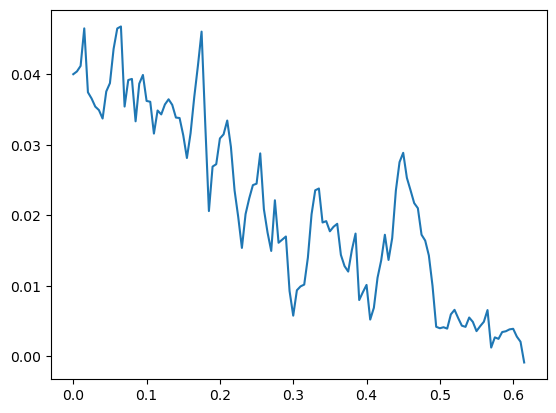

In [5]:
plt.plot(time,nu_t)

2. If $\nu_t<0$ is causing problems, enter a *reflecting* boundary condition to your path calculation, that is
$$\nu^{k+1} =\left\{ \begin{array}{cc}
\nu^k +\kappa(\theta-\nu^k)\Delta t + \xi \sqrt{\nu^k} \Delta W_2 &\text{ if } \quad \nu^k + d\nu^k \geq 0\\
-(\nu^k +\kappa(\theta-\nu^k)\Delta t + \xi \sqrt{\nu^k} \Delta W_2) &\text{ if }\quad \nu^k + d\nu^k < 0
\end{array}\right.
$$  


In [6]:
# path number
i=0
for k in range(0,K):
    # implement condition above to say nu_t is negative reverse the sign.
    if nu_t[k]<0.0:
        nu_t[k] = -nu_t[k]
    nu_sqrt=numpy.sqrt(nu_t[k])
    time[k+1] = (k+1)*dt
    S_t[k+1] = S_t[k] + (r-q)*S_t[k]*dt + nu_sqrt*S_t[k]*dW1[i][k]
    nu_t[k+1] = nu_t[k] + kappa_nu*(theta_nu - nu_t[k])*dt + xi_nu*nu_sqrt*dW2[i][k]

Now the same path should stay positive and get a result for all $t$.

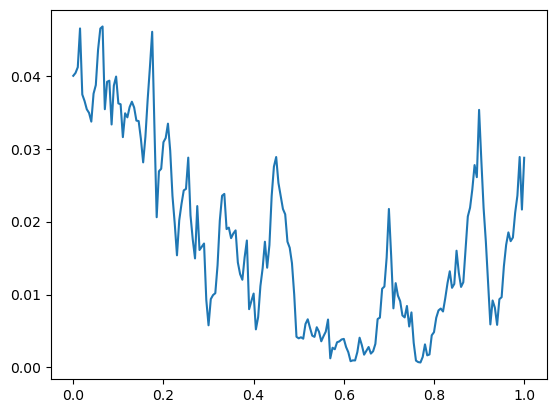

In [7]:
plt.plot(time,nu_t)

3. Simulate $N$ paths and calculate the average payoff of a call option to estimate the call option value

Now put this in a function and run through N paths to get the average result. 

In [10]:
def hestonEuropeanCall(S_0,q,X,T,r,kappa_nu,theta_nu,nu_0,xi_nu,rho,N,K):
    # setup step size
    dt = T/K
    # generate multivariate normals for dW1 and dW2
    dW1 , dW2 = rng.multivariate_normal( [ 0.0 , 0.0 ] , [ [ dt , rho*dt ] , [ rho*dt , dt] ] , size = (K,N) ).T

    # create a path variable for S and nu
    time = numpy.zeros(K+1)
    S_t = numpy.zeros(K+1)
    nu_t = numpy.zeros(K+1)

    # sum up payoffs
    sum = 0.0
    
    for i in range(0,N):
        # reset the paths by initialising first value
        S_t[0] = S_0
        nu_t[0] = nu_0
        # generate values on the path
        for k in range(0,K):
            # implement condition above to say nu_t is negative reverse the sign.
            if nu_t[k]<0.0:
                nu_t[k] = -nu_t[k]
            nu_sqrt=numpy.sqrt(nu_t[k])
            S_t[k+1] = S_t[k] + (r-q)*S_t[k]*dt + nu_sqrt*S_t[k]*dW1[i][k]
            nu_t[k+1] = nu_t[k] + kappa_nu*(theta_nu - nu_t[k])*dt + xi_nu*nu_sqrt*dW2[i][k]
        # add in payoff for the call option
        sum = sum + max(S_t[K] - X,0.0)
    
    return sum/N *numpy.exp(-r*T)        

We get the following result:

In [12]:
print(hestonEuropeanCall(S_0,q,X,T,r,kappa_nu,theta_nu,nu_0,xi_nu,rho,N,K))

8.318603437703075


4. Analyse the results for different values of $N$ and $K$, what can you say about the effect of increasing or decreasing each of the numerical parameters.



First run some results with $K=10$ and see what values we get...

In [13]:
for N in range(1000,50000,1000):
    K=10
    print("N:=",N,"; K:=",K,"; C:=",hestonEuropeanCall(S_0,q,X,T,r,kappa_nu,theta_nu,nu_0,xi_nu,rho,N,K) )

N:= 1000 ; K:= 10 ; C:= 8.763833033517304
N:= 2000 ; K:= 10 ; C:= 8.027756987454909
N:= 3000 ; K:= 10 ; C:= 8.5464477583678
N:= 4000 ; K:= 10 ; C:= 8.338353095308271
N:= 5000 ; K:= 10 ; C:= 8.24931847604603
N:= 6000 ; K:= 10 ; C:= 8.375322859145292
N:= 7000 ; K:= 10 ; C:= 8.376575451575102
N:= 8000 ; K:= 10 ; C:= 8.43251195341193
N:= 9000 ; K:= 10 ; C:= 8.393896654597029
N:= 10000 ; K:= 10 ; C:= 8.2763291271528
N:= 11000 ; K:= 10 ; C:= 8.277568586885536
N:= 12000 ; K:= 10 ; C:= 8.543584223517051
N:= 13000 ; K:= 10 ; C:= 8.613540107584791
N:= 14000 ; K:= 10 ; C:= 8.425719420638268
N:= 15000 ; K:= 10 ; C:= 8.625553565836087
N:= 16000 ; K:= 10 ; C:= 8.460515069346355
N:= 17000 ; K:= 10 ; C:= 8.588298149168796
N:= 18000 ; K:= 10 ; C:= 8.604372199965395
N:= 19000 ; K:= 10 ; C:= 8.459345082911527
N:= 20000 ; K:= 10 ; C:= 8.682741608272114
N:= 21000 ; K:= 10 ; C:= 8.480887784060927
N:= 22000 ; K:= 10 ; C:= 8.471473813797633
N:= 23000 ; K:= 10 ; C:= 8.465252360454889
N:= 24000 ; K:= 10 ; C:= 8

It appears as though central limit theorem applies here and the estimator is unbiased (mean is the same independent of $N$). The variance in the results is going down as $N$ increases.

Now try again for large $K$...

In [14]:
for N in range(1000,50000,1000):
    K=50
    print("N:=",N,"; K:=",K,"; C:=",hestonEuropeanCall(S_0,q,X,T,r,kappa_nu,theta_nu,nu_0,xi_nu,rho,N,K) )

N:= 1000 ; K:= 50 ; C:= 8.376810280607831
N:= 2000 ; K:= 50 ; C:= 7.916161714788955
N:= 3000 ; K:= 50 ; C:= 8.530589308833306
N:= 4000 ; K:= 50 ; C:= 8.280204378615721
N:= 5000 ; K:= 50 ; C:= 8.317066824069443
N:= 6000 ; K:= 50 ; C:= 8.381647190344157
N:= 7000 ; K:= 50 ; C:= 8.531888031330142
N:= 8000 ; K:= 50 ; C:= 8.343749032429542
N:= 9000 ; K:= 50 ; C:= 8.411885656871677
N:= 10000 ; K:= 50 ; C:= 8.354797495147468
N:= 11000 ; K:= 50 ; C:= 8.218649322589437
N:= 12000 ; K:= 50 ; C:= 8.202976295702651
N:= 13000 ; K:= 50 ; C:= 8.210402625817476
N:= 14000 ; K:= 50 ; C:= 8.332639255775153
N:= 15000 ; K:= 50 ; C:= 8.430345368145153
N:= 16000 ; K:= 50 ; C:= 8.460287299128176
N:= 17000 ; K:= 50 ; C:= 8.202544670376485
N:= 18000 ; K:= 50 ; C:= 8.292445972705814
N:= 19000 ; K:= 50 ; C:= 8.200362732281162
N:= 20000 ; K:= 50 ; C:= 8.217327272882796
N:= 21000 ; K:= 50 ; C:= 8.379666211798565
N:= 22000 ; K:= 50 ; C:= 8.143310992732095
N:= 23000 ; K:= 50 ; C:= 8.38012538555393
N:= 24000 ; K:= 50 ; 

The value is noticeably lower when the higher value of $K$ is used, the variance of the result is about the same as before. We expect that increasing $K$ will eventually just increase the computation times without having much effect on the accuracy of the estimate. This is because the variance of the result is linked to $N$ as well.

5. For the model parameters: $S_0 = 98.31$, $q = 0.01$, $X = 100$, $T = 1$, $r=0.03$, $\kappa = 1.5$, $\theta = 0.06$, $\nu_0 = 0.04$, $\xi = 0.4$ and $\rho = -0.5 $ the analytic result found using a numerical library is $C(S_0,t=0)=8.2623461$.

What can you say about the errors of your Monte Carlo vs this value?

 For this numerical estimate $C(S_0,t;N,K)$ with $N$ paths and $K$ steps, the true solution $C_\text{exact}$ is given by

$$
\lim_{N\to\infty, K\to\infty } C(S_0,t=0;N,K) =C_\text{exact}(S_0,t=0) .
$$

Looking at our results, with $K=50$ and $N=50,000$, the approximation has errors of about $0.02$. To get more accuracy we need more paths $N$ and larger $K$ which means more computation time. Variance reduction techniques could improve this. 

## Path Dependent Options

In [17]:
# SDE parameters
S_0 = 104.82
sigma=0.4
r=0.03

# contract parameters
T=1.
X=30.
K=20

# numerical parameters
N=1000

6. Program your solution into a function

In [18]:
def pathDependentOption(S_0,sigma,r,T,X,K,N):
    # set timestep
    dt = T/K 
    
    #generate random numbers
    dW = rng.normal( 0.0 , numpy.sqrt(dt) , size = (N,K) )

    # setup storage for path
    S_t = numpy.zeros(K+1)

    # sum up payoff
    sum = 0.0
    for i in  range(0,N):
        # initialise path
        S_t[0] = S_0
        # run through path
        for k in range(0,K):
            S_t[k+1] = S_t[k] * numpy.exp((r-0.5*sigma*sigma)*dt+sigma*dW[i][k])
        # initialise path variable
        A=0.0
        # sum up deviations
        for k in range(0,K):
            A = A + abs(S_t[k+1] - S_t[k])
        A = A/numpy.sqrt(K)
        # add in payoff
        sum = sum + max(A-X,0.0)
    return sum/N * numpy.exp(-r*T)

7. Analyse the effect of $N$ and $K$ on your results

In [19]:
for N in range(1000,50000,1000):
    K=20
    print("N:=",N,"; K:=",K,"; V:=",pathDependentOption(S_0,sigma,r,T,X,K,N) )

N:= 1000 ; K:= 20 ; V:= 6.338939664597046
N:= 2000 ; K:= 20 ; V:= 5.665248516489513
N:= 3000 ; K:= 20 ; V:= 5.826105591242014
N:= 4000 ; K:= 20 ; V:= 5.810230647779656
N:= 5000 ; K:= 20 ; V:= 5.514208182192579
N:= 6000 ; K:= 20 ; V:= 5.752880698158206
N:= 7000 ; K:= 20 ; V:= 5.822314558033204
N:= 8000 ; K:= 20 ; V:= 5.55292587337313
N:= 9000 ; K:= 20 ; V:= 5.712107022556477
N:= 10000 ; K:= 20 ; V:= 5.719337794045476
N:= 11000 ; K:= 20 ; V:= 5.695294178956722
N:= 12000 ; K:= 20 ; V:= 5.762774852224935
N:= 13000 ; K:= 20 ; V:= 5.7680241545335615
N:= 14000 ; K:= 20 ; V:= 5.709017352698102
N:= 15000 ; K:= 20 ; V:= 5.744067533437544
N:= 16000 ; K:= 20 ; V:= 5.713991899991429
N:= 17000 ; K:= 20 ; V:= 5.769236468577867
N:= 18000 ; K:= 20 ; V:= 5.7146060159854075
N:= 19000 ; K:= 20 ; V:= 5.889450862568409
N:= 20000 ; K:= 20 ; V:= 5.799666470305914
N:= 21000 ; K:= 20 ; V:= 5.776729155385205
N:= 22000 ; K:= 20 ; V:= 5.753194718913097
N:= 23000 ; K:= 20 ; V:= 5.837232557831339
N:= 24000 ; K:= 20 

The solution looks to be converging around $V=5.7$ to two significant figures. We would need to run with much larger $N$ to get higher accuracy.

To check things are working properly, run again with a smaller value of $K$, can you predict what will happen to the value?

In [20]:
for N in range(1000,50000,1000):
    K=5
    print("N:=",N,"; K:=",K,"; V:=",pathDependentOption(S_0,sigma,r,T,X,K,N) )

N:= 1000 ; K:= 5 ; V:= 7.451999627468526
N:= 2000 ; K:= 5 ; V:= 7.098467000357135
N:= 3000 ; K:= 5 ; V:= 7.131865685532631
N:= 4000 ; K:= 5 ; V:= 7.164488441454872
N:= 5000 ; K:= 5 ; V:= 7.320326910858155
N:= 6000 ; K:= 5 ; V:= 7.146275862669287
N:= 7000 ; K:= 5 ; V:= 7.157704116728096
N:= 8000 ; K:= 5 ; V:= 7.264131339733159
N:= 9000 ; K:= 5 ; V:= 6.916796992129154
N:= 10000 ; K:= 5 ; V:= 7.1333817226317215
N:= 11000 ; K:= 5 ; V:= 7.159594808991429
N:= 12000 ; K:= 5 ; V:= 7.226765054795954
N:= 13000 ; K:= 5 ; V:= 7.344257317219973
N:= 14000 ; K:= 5 ; V:= 7.314305375092987
N:= 15000 ; K:= 5 ; V:= 7.166434383621421
N:= 16000 ; K:= 5 ; V:= 7.020853906189603
N:= 17000 ; K:= 5 ; V:= 7.145596047248899
N:= 18000 ; K:= 5 ; V:= 7.278873989610834
N:= 19000 ; K:= 5 ; V:= 7.316491599504437
N:= 20000 ; K:= 5 ; V:= 7.34093807815901
N:= 21000 ; K:= 5 ; V:= 7.333729536122332
N:= 22000 ; K:= 5 ; V:= 7.067399569601416
N:= 23000 ; K:= 5 ; V:= 7.247812707880801
N:= 24000 ; K:= 5 ; V:= 7.082202879228492
N

Looks as though the value of $V$ increases as $K$ goes down. This is likely due to the averaging effect of $\frac{1}{\sqrt{K}}$ part of $A$, meaning the likelyhood of a large payoff is decreased when $K$ is large.

For larger values of $K$, we should see the solution settle on a fixed value.

8. There is no obvious analystic solution for the discrete case $K=20$ -- are you able to estimate the error even if you don't know the real solution? 

Yes, via the Central Limit Theorem. If we can estimate the variance of our solution with $N$ paths, and each simulation is independent and  identically distributed, then the mean should be the true solution and the variance gives a confidence interval.

9. Choosing the largest value of $N$ you can feasibly run given the calculation time, state a confidence interval for the result.

First run a bunch of results with $N=1000$:

In [27]:
results = 10000

V_array = numpy.zeros(results)

for i in range(0,results):
    N = 1000
    K = 20
    V_array[i] = pathDependentOption(S_0,sigma,r,T,X,K,N) 



Now calculate the mean and variance of the distribution of $V_\text{N=1000}$:

In [28]:
mean = numpy.average(V_array)
var = numpy.var(V_array)

Confidence interval is given by sample mean and variance:

In [29]:
print("Confidence interval at 95% level := [",mean-2*numpy.sqrt(var/results)," , ",mean+2*numpy.sqrt(var/results),"]"  )

Confidence interval at 95% level := [ 5.743543040769507  ,  5.75398937277435 ]
